<a href="https://colab.research.google.com/github/gerick21/Laboratorio--3-Introduccion-Programacion-Paralela/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import threading
import random
import time

suma_tiempos = []

In [ ]:
def ordenar_subvector(subvector, hilo):
    global suma_tiempos
    tiempo_inicio = time.time()
    subvector.sort()
    tiempo_fin = time.time()
    tiempo_ejecucion = tiempo_fin - tiempo_inicio
    suma_tiempos.append(tiempo_ejecucion)
    print(f"Hilo {hilo}: Subvector ordenado (Tiempo: {tiempo_ejecucion:.10f} segundos)")

In [ ]:
def dividir_vector(vector, num_hilos):
    longitud_subvector = len(vector) // num_hilos
    subvectores = [vector[i:i+longitud_subvector] for i in range(0, len(vector), longitud_subvector)]
    return subvectores

In [ ]:
def unir_vectores(subvectores):
    vector_ordenado = [num for subvector in subvectores for num in subvector]
    return vector_ordenado

In [ ]:
def ordenar_vector(vector, num_hilos):
    subvectores = dividir_vector(vector, num_hilos)
    threads = []

    for i, subvector in enumerate(subvectores):
        thread = threading.Thread(target=ordenar_subvector, args=(subvector, i))
        thread.start()
        threads.append(thread)
    for thread in threads:
        thread.join()
    vector_ordenado = unir_vectores(subvectores)
    print(f"Vector ordenado final: {vector_ordenado}")

In [ ]:
if __name__ == "__main__":
    vector_grande = [random.randint(1, 100) for _ in range(100)]
    num_hilos = int(input("Ingrese la cantidad de hilos: "))
    ordenar_vector(vector_grande, num_hilos)
    t_sum = 0

    for i in suma_tiempos:
      t_sum += i

    print(suma_tiempos)

    print(f"El tiempo total es de: {t_sum:.10f}")


Ingrese la cantidad de hilos: 10
Hilo 0: Subvector ordenado (Tiempo: 0.0000045300 segundos)
Hilo 1: Subvector ordenado (Tiempo: 0.0000030994 segundos)Hilo 2: Subvector ordenado (Tiempo: 0.0000023842 segundos)

Hilo 3: Subvector ordenado (Tiempo: 0.0000030994 segundos)Hilo 4: Subvector ordenado (Tiempo: 0.0000026226 segundos)

Hilo 5: Subvector ordenado (Tiempo: 0.0000026226 segundos)
Hilo 6: Subvector ordenado (Tiempo: 0.0000030994 segundos)
Hilo 7: Subvector ordenado (Tiempo: 0.0000023842 segundos)
Hilo 8: Subvector ordenado (Tiempo: 0.0000023842 segundos)
Hilo 9: Subvector ordenado (Tiempo: 0.0000028610 segundos)
Vector ordenado final: [13, 17, 19, 26, 46, 52, 60, 70, 77, 77, 21, 25, 27, 39, 42, 48, 51, 63, 85, 86, 1, 5, 5, 13, 24, 40, 41, 59, 70, 79, 10, 22, 32, 38, 42, 50, 80, 85, 93, 96, 34, 48, 51, 59, 62, 68, 85, 87, 94, 95, 5, 6, 14, 31, 37, 61, 70, 76, 89, 90, 8, 13, 14, 15, 25, 34, 44, 50, 72, 95, 6, 24, 39, 48, 54, 57, 75, 81, 84, 99, 10, 12, 22, 41, 45, 47, 48, 58, 59, 74, 

# **# Laboratorio #3 - Gerick Vargas Camacho 🧪**

Al ejecutar el código proporcionado por primera vez, se observa un error durante el proceso de ordenamiento de los elementos.

`Vector ordenado final: [9, 12, 29, 34, 50, 52, 80, 82, 84, 86, 12, 20, 32, 42, 52, 68, 69, 69, 73, 73, 11, 13, 25, 31, 48, 78, 83, 88, 90, 95, 5, 10, 11, 31, 40, 66, 82, 88, 95, 100, 13, 23, 28, 39, 43, 50, 65, 71, 74, 92, 1, 2, 11, 14, 32, 39, 43, 58, 84, 87, 4, 19, 74, 76, 85, 89, 94, 95, 96, 100, 2, 12, 19, 23, 40, 52, 57, 64, 85, 100, 30, 36, 40, 40, 41, 44, 45, 58, 75, 84, 8, 12, 16, 38, 48, 64, 81, 85, 99, 100]`

La raíz del problema radica en el no empleo del comando de ordenamiento (sort) al concluir la combinación de los subvectores para formar el vector final. Se realizó la corrección de la siguiente manera:




```
def unir_vectores(subvectores):
    vector_ordenado = [num for subvector in subvectores for num in subvector]
    vector_ordenado.sort()
    return vector_ordenado
```


`Vector ordenado final: [2, 3, 4, 5, 6, 6, 7, 8, 10, 12, 13, 13, 14, 14, 14, 18, 18, 20, 20, 20, 20, 20, 21, 23, 24, 24, 27, 28, 30, 31, 32, 33, 33, 35, 36, 38, 38, 38, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 49, 51, 51, 52, 52, 52, 55, 56, 56, 56, 59, 60, 61, 61, 62, 64, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 75, 75, 77, 77, 77, 78, 78, 80, 80, 81, 82, 82, 84, 85, 87, 91, 92, 92, 94, 94, 96, 96, 96, 96, 97, 99]`

La siguiente tabla  compara los tiempos de ejecución según la cantidad de hilos utilizados:


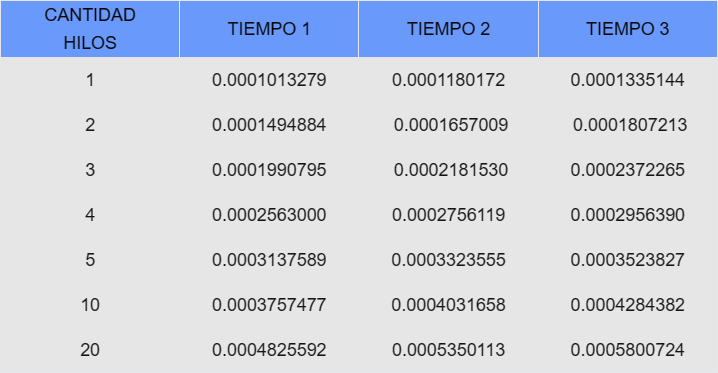



Basándonos en los resultados obtenidos de las diversas pruebas realizadas, concluimos que el tiempo de ejecución es más óptimo al utilizar menos hilos, especialmente al emplear solo 1 hilo.